#URL dashboard
https://public.tableau.com/views/h8dsft_Milestone1_theo_jonathan/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

#**Milestone 1**
Theo Jonathan FTDS Batch 019

##**Identifikasi Masalah**

###**Topik Permasalahan**

Saya adalah seorang Data Analis yang mempunyai klien yaitu sebuah restoran pizza di New Jersey. Klien meminta saya untuk menganalisa data penjualan mereka untuk mencari tahu pizza apa yang selama ini paling banyak terjual dan yang paling sedikit terjual dan apa yang harus dilakukan untuk meningkatkan penjualan mereka.

###**Problem Statement**

1. Mencari tahu penjualan selama tahun 2015.
2. Mencari tahu trend penjualan selama tahun 2015.
3. Mencari tahu apa yang harus dilakukan untuk meningkatkan penjualan.
4. Apa yang bisa dilakukan agar bisa bekerja lebih effisien?

###**Latar Belakang Permasalahan**

Pemilik restoran membuat data hasil penjualan selama tahun 2015 dan ingin tahu apa yang bisa dilakukan berdasarkan data tersebut. Pemilik juga ingin mengetahui apakah sudah saatnya untuk membuka cabang baru atau belum.

###**Poin Penjabaran**

1. Mencari total penjualan pizza di tahun 2015.
2. Mencari tahu pizza apa yang paling banyak terjual dan paling sedikit terjual.
3. Type Pizza apa yang memberikan paling banyak penjualan?
4. Mencari tahu size dan type pizza apa yang paling banyak terjual?
5. Mencari tahu di bulan apa terdapat penjualan terbanyak di tahun 2015
6. Memeriksa distribusi data Type pizza yang paling banyak terjual.
7. Bila ingin membuka cabang baru, berapa total penjualan yang harus didapatkan di cabang kedua?

##**Data Loading**

In [35]:
#Import pustaka yang dibutuhkan
import pandas as pd
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Query dari SQL

SELECT * FROM `hacktiv8-378309.Pizza_sales.sales3` 

SELECT date as Date, time as Time, name as Name,size as Size, type as Type, price as Price

FROM `hacktiv8-378309.Pizza_sales.sales3` 

Sumber referensi data dari Kaggle

https://www.kaggle.com/datasets/ulrikthygepedersen/pizza-place-sales

In [36]:
#Loading dataset
copied_path = '/content/pizzadataset.csv'
df = pd.read_csv ('/content/pizzadataset.csv')
df

,Date,Time,Name,Size,Type,Price
0,2015-01-01,12:29:36,bbq_ckn,S,chicken,12.75
1,2015-01-02,17:54:04,bbq_ckn,S,chicken,12.75
2,2015-01-02,20:12:34,bbq_ckn,S,chicken,12.75
3,2015-01-03,21:21:24,bbq_ckn,S,chicken,12.75
4,2015-01-04,12:12:05,bbq_ckn,S,chicken,12.75
...,...,...,...,...,...,...
49569,2015-12-20,13:45:27,spinach_supr,L,supreme,20.75
49570,2015-12-20,18:28:25,spinach_supr,L,supreme,20.75
49571,2015-12-21,22:07:07,spinach_supr,L,supreme,20.75
49572,2015-12-28,12:38:57,spinach_supr,L,supreme,20.75


In [37]:
df.head()

,Date,Time,Name,Size,Type,Price
0,2015-01-01,12:29:36,bbq_ckn,S,chicken,12.75
1,2015-01-02,17:54:04,bbq_ckn,S,chicken,12.75
2,2015-01-02,20:12:34,bbq_ckn,S,chicken,12.75
3,2015-01-03,21:21:24,bbq_ckn,S,chicken,12.75
4,2015-01-04,12:12:05,bbq_ckn,S,chicken,12.75


In [38]:
df.tail()

,Date,Time,Name,Size,Type,Price
49569,2015-12-20,13:45:27,spinach_supr,L,supreme,20.75
49570,2015-12-20,18:28:25,spinach_supr,L,supreme,20.75
49571,2015-12-21,22:07:07,spinach_supr,L,supreme,20.75
49572,2015-12-28,12:38:57,spinach_supr,L,supreme,20.75
49573,2015-12-30,12:45:20,spinach_supr,L,supreme,20.75


##**Data Cleaning**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    49574 non-null  object 
 1   Time    49574 non-null  object 
 2   Name    49574 non-null  object 
 3   Size    49574 non-null  object 
 4   Type    49574 non-null  object 
 5   Price   49574 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [40]:
#Mencari missing values
df.isnull().sum()

Date     0
Time     0
Name     0
Size     0
Type     0
Price    0
dtype: int64

In [41]:
#Mengatasi missing value dengan menghapusnya
dfclean = df.dropna()
dfclean

,Date,Time,Name,Size,Type,Price
0,2015-01-01,12:29:36,bbq_ckn,S,chicken,12.75
1,2015-01-02,17:54:04,bbq_ckn,S,chicken,12.75
2,2015-01-02,20:12:34,bbq_ckn,S,chicken,12.75
3,2015-01-03,21:21:24,bbq_ckn,S,chicken,12.75
4,2015-01-04,12:12:05,bbq_ckn,S,chicken,12.75
...,...,...,...,...,...,...
49569,2015-12-20,13:45:27,spinach_supr,L,supreme,20.75
49570,2015-12-20,18:28:25,spinach_supr,L,supreme,20.75
49571,2015-12-21,22:07:07,spinach_supr,L,supreme,20.75
49572,2015-12-28,12:38:57,spinach_supr,L,supreme,20.75


In [42]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    49574 non-null  object 
 1   Time    49574 non-null  object 
 2   Name    49574 non-null  object 
 3   Size    49574 non-null  object 
 4   Type    49574 non-null  object 
 5   Price   49574 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


Hasil analisa : tidak ada missing values pada data.

##**Analisis dan Perhitungan**

###Menjawab poin pertanyaan nomor 1
Total penjualan pizza di tahun 2015.

In [43]:
df1 = dfclean.groupby("Name")['Price'].sum()
df1

Name
bbq_ckn         42768.00
big_meat        22968.00
brie_carre      11588.50
calabrese       15934.25
cali_ckn        41409.50
ckn_alfredo     16900.25
ckn_pesto       16701.75
classic_dlx     38180.50
five_cheese     26066.50
four_cheese     32265.70
green_garden    13955.75
hawaiian        32273.25
ital_cpcllo     25094.00
ital_supr       33476.75
ital_veggie     16019.25
mediterraneo    15360.50
mexicana        26780.75
napolitana      24087.00
pep_msh_pep     18834.50
pepperoni       30161.75
peppr_salami    25529.00
prsc_argla      24193.25
sicilian        30940.50
soppressata     16425.75
southw_ckn      34705.75
spicy_ital      34831.25
spin_pesto      15596.00
spinach_fet     23271.25
spinach_supr    15277.75
thai_ckn        43434.25
the_greek       28454.10
veggie_veg      24374.75
Name: Price, dtype: float64

Text(0.5, 1.0, 'Total Sales in 2015')

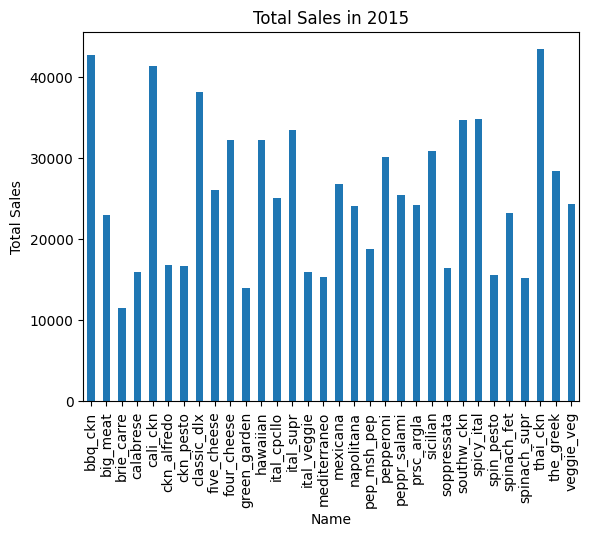

In [44]:
#Visualisasi data menggunakan bar chart
chart1 = df1.plot(kind='bar')
plt.ylabel('Total Sales')
chart1.set_title("Total Sales in 2015")

In [45]:
print("Total Sales:",df1.sum())

Total Sales: 817860.05


Hasil analisa

Total penjualan pizza selama tahun 2015 adalah $817860.05

###Menjawab poin pertanyaan nomor 2
Pizza apa yang paling banyak terjual dan paling sedikit terjual

In [46]:
df2 = dfclean["Name"].value_counts()
df2

classic_dlx     2453
bbq_ckn         2432
hawaiian        2422
pepperoni       2418
thai_ckn        2371
cali_ckn        2370
sicilian        1938
spicy_ital      1924
southw_ckn      1917
big_meat        1914
four_cheese     1902
ital_supr       1884
veggie_veg      1526
mexicana        1484
napolitana      1464
prsc_argla      1457
spinach_fet     1446
peppr_salami    1446
ital_cpcllo     1438
the_greek       1420
five_cheese     1409
pep_msh_pep     1359
green_garden     997
ckn_alfredo      987
ital_veggie      981
ckn_pesto        973
spin_pesto       970
soppressata      961
spinach_supr     950
calabrese        937
mediterraneo     934
brie_carre       490
Name: Name, dtype: int64

Text(0.5, 1.0, 'Most Sold & Least Sold in 2015')

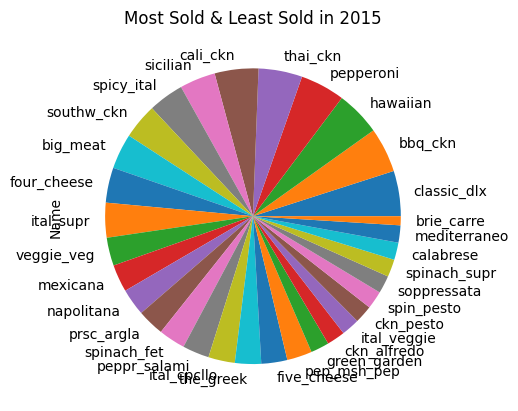

In [47]:
#Visualisasi data menggunakan pie chart
chart2 = df2.plot(kind='pie')

chart2.set_title("Most Sold & Least Sold in 2015")

In [48]:
print("Total Pizza yang terjual:",df2.sum())
print("Pizza yang terjual paling banyak:",df2.max(),"yaitu classic_dlx")
print("Pizza yang terjual paling sedikit:",df2.min(),"yaitu brie_carre")

Total Pizza yang terjual: 49574
Pizza yang terjual paling banyak: 2453 yaitu classic_dlx
Pizza yang terjual paling sedikit: 490 yaitu brie_carre


Hasil analisa

Total pizza yang terjual selama tahun 2015 sebanyak 49574 dengan Pizza classic_dlx sebagai pizza yang terjual paling banyak dengan total penjualan sebanyak 2453 pizza dan Pizza brie_carre sebagai pizza yang paling sedikit terjual dengan total penjualan 490 pizza.

###Menjawab poin pertanyaan nomor 3
Type Pizza yang memberikan paling banyak penjualan

In [49]:
df3 = dfclean.groupby(df["Type"]).sum().sort_values('Price')
df3
     

<ipython-input-49-9ec4dbb1ae62>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = dfclean.groupby(df["Type"]).sum().sort_values('Price')


,Price
Type,
veggie,193690.45
chicken,195919.50
supreme,208197.00
classic,220053.10


In [50]:
df3.max()

Price    220053.1
dtype: float64

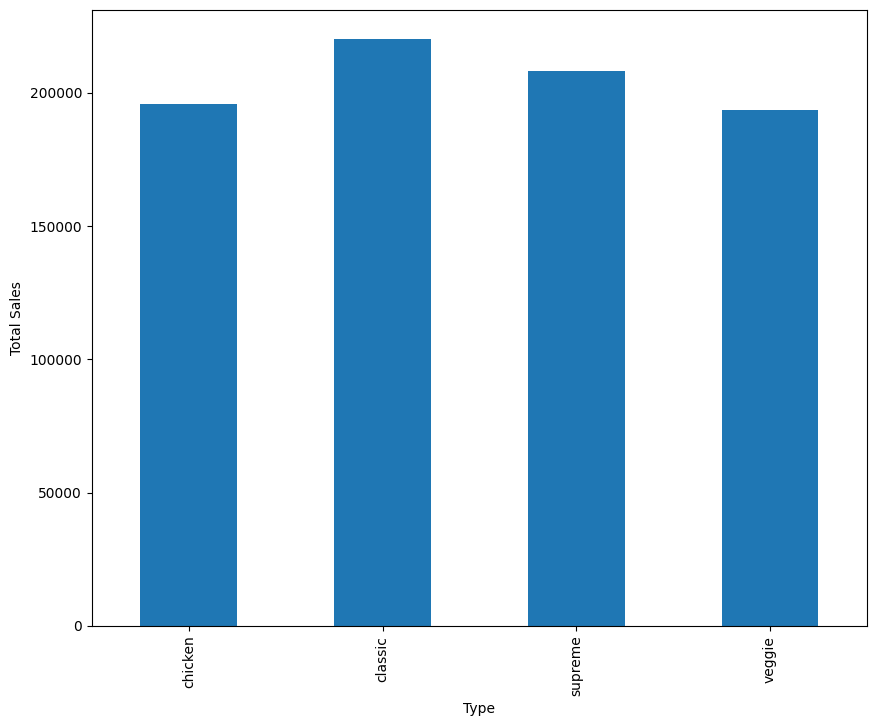

In [51]:
#Visualisasi data menggunakan line chart
plt.figure(figsize=(10,8))
df3.groupby(['Type'])['Price'].sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.show()

Hasil analisa

Type Pizza yang memberikan paling banyak penjualan adalah type classic dengan total penjualan $220053.1

###Menjawab poin pertanyaan nomor 4
Mencari tahu size dan type pizza apa yang paling banyak terjual

In [52]:
df4 = dfclean.groupby(['Type', 'Size']).aggregate(
    {'Price': 'sum', 'Price': ['sum']}
)
df4

Price
                    sum
Type    Size           
chicken L     102339.00
        M      65224.50
        S      28356.00
classic L      74518.50
        M      60581.75
        S      69870.25
        XL     14076.00
        XXL     1006.60
supreme L      94258.50
        M      66475.00
        S      47463.50
veggie  L     104202.70
        M      57101.00
        S      32386.75

In [53]:
df4.max()

Price  sum    104202.7
dtype: float64

Text(0, 0.5, 'Total Sales')

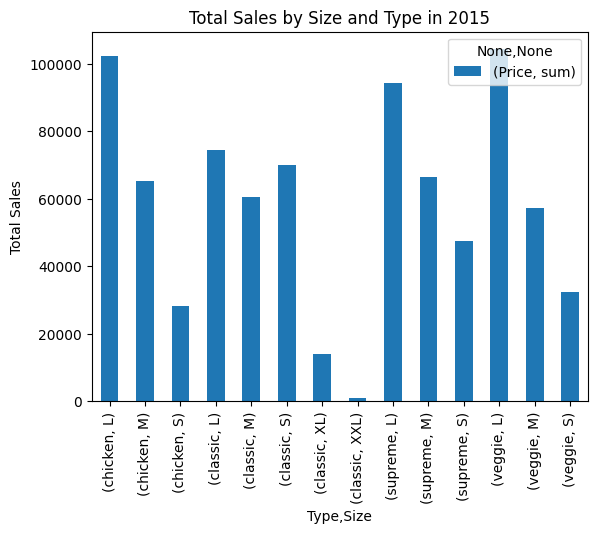

In [54]:
#Visualisasi data menggunakan bar chart
chart4 = df4.plot(kind='bar')
chart4.set_title("Total Sales by Size and Type in 2015")
plt.ylabel('Total Sales')

Hasil analisa

Size pizza dan type pizza yang paling banyak terjual adalah type veggie dengan size L dengan total penjualan $104202.70

###Menjawab poin pertanyaan nomor 5
Mencari tahu di bulan apa terdapat penjualan terbanyak di tahun 2015

In [55]:
#Menambah column Month agar lebih mudah untuk dihitung
dfclean['Month'] = dfclean['Date'].str[5:7]
dfclean

,Date,Time,Name,Size,Type,Price,Month
0,2015-01-01,12:29:36,bbq_ckn,S,chicken,12.75,01
1,2015-01-02,17:54:04,bbq_ckn,S,chicken,12.75,01
2,2015-01-02,20:12:34,bbq_ckn,S,chicken,12.75,01
3,2015-01-03,21:21:24,bbq_ckn,S,chicken,12.75,01
4,2015-01-04,12:12:05,bbq_ckn,S,chicken,12.75,01
...,...,...,...,...,...,...,...
49569,2015-12-20,13:45:27,spinach_supr,L,supreme,20.75,12
49570,2015-12-20,18:28:25,spinach_supr,L,supreme,20.75,12
49571,2015-12-21,22:07:07,spinach_supr,L,supreme,20.75,12
49572,2015-12-28,12:38:57,spinach_supr,L,supreme,20.75,12


In [56]:
df5 = dfclean.groupby("Month").sum()
df5

<ipython-input-56-55029114db2b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5 = dfclean.groupby("Month").sum()


,Price
Month,
01,69793.30
02,65159.60
03,70397.10
04,68736.80
05,71402.75
06,68230.20
07,72557.90
08,68278.25
09,64180.05


Text(0, 0.5, 'Total Sales')

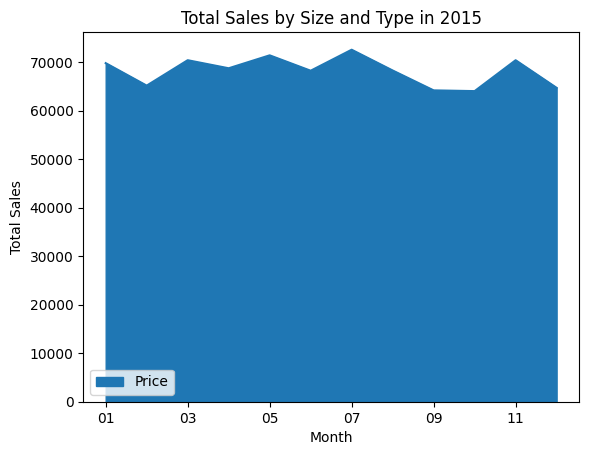

In [57]:
#Visualisasi data menggunakan area plot
chart5 = df5.plot(kind='area')
chart5.set_title("Total Sales by Size and Type in 2015")
plt.ylabel('Total Sales')

Hasil analisa

Penjualan terbanyak di tahun 2015 terdapat di bulan Juli dengan total penjualan $72557.90

###Menjawab poin pertanyaan nomor 6
 Memeriksa distribusi data Type pizza yang paling banyak terjual.

In [58]:
#Memeriksa distribusi data Type pizza classic
df6 = dfclean[dfclean["Type"] == "classic"].reset_index(drop=True)
df6.sort_values('Price')

,Date,Time,Name,Size,Type,Price,Month
5275,2015-01-01,15:50:18,pepperoni,S,classic,9.75,01
5772,2015-08-29,14:41:12,pepperoni,S,classic,9.75,08
5773,2015-08-30,15:14:36,pepperoni,S,classic,9.75,08
5774,2015-08-30,17:19:48,pepperoni,S,classic,9.75,08
5775,2015-08-30,18:03:56,pepperoni,S,classic,9.75,08
...,...,...,...,...,...,...,...
8148,2015-02-13,13:52:26,the_greek,XXL,classic,35.95,02
8147,2015-01-27,16:28:38,the_greek,XXL,classic,35.95,01
8146,2015-01-26,15:24:38,the_greek,XXL,classic,35.95,01
8160,2015-05-31,18:31:11,the_greek,XXL,classic,35.95,05


In [59]:
#Memeriksa tingkat skewness
print('Skewness:',df6['Price'].skew())

Skewness: 1.1307372143179995


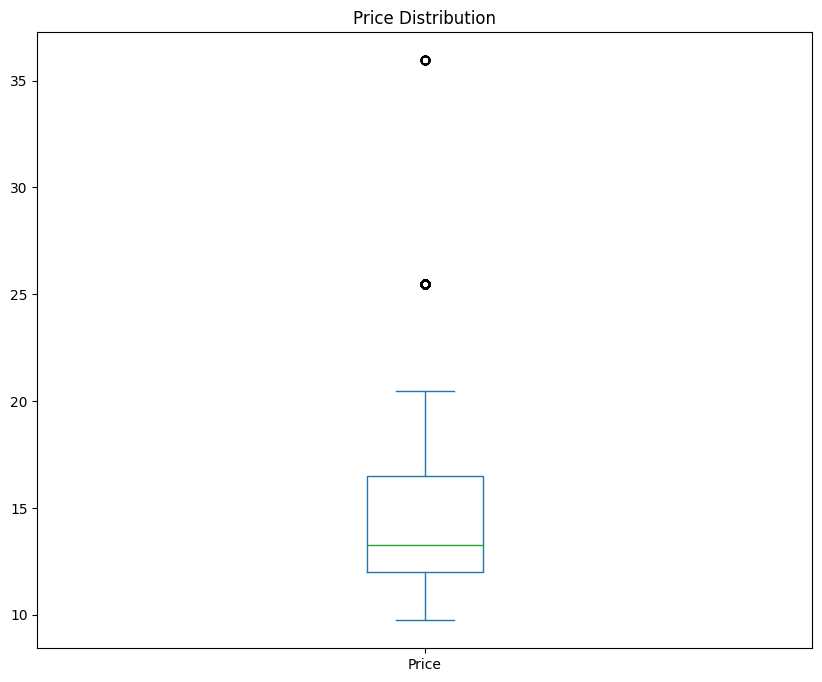

In [60]:
df6['Price'].plot(kind='box', title='Price Distribution', figsize=(10,8))
plt.show() 

Terdapat 2 oultier dari visualisasi di atas yang artinya ada 2 harga yang bisa dikatakan sangat jauh berbeda dengan harga yang lainnya.

In [61]:
#Mengitung berapa persen jumlah outlier
Q1=df6['Price'].quantile(0.25)
Q3=df6['Price'].quantile(0.75)
print('Q1=', Q1)
print('Q3=', Q3)

#Menghitung IQR
IQR = Q3-Q1
print('IQR=',IQR)

Q1= 12.0
Q3= 16.5
IQR= 4.5


In [62]:
#Menghilangkan outlier
upper_limit= Q3 + 1.5*IQR
lower_limit= Q1 - 1.5*IQR

df6clean=df6[(df6['Price'] <= upper_limit) | (df6['Price'] <= lower_limit)]

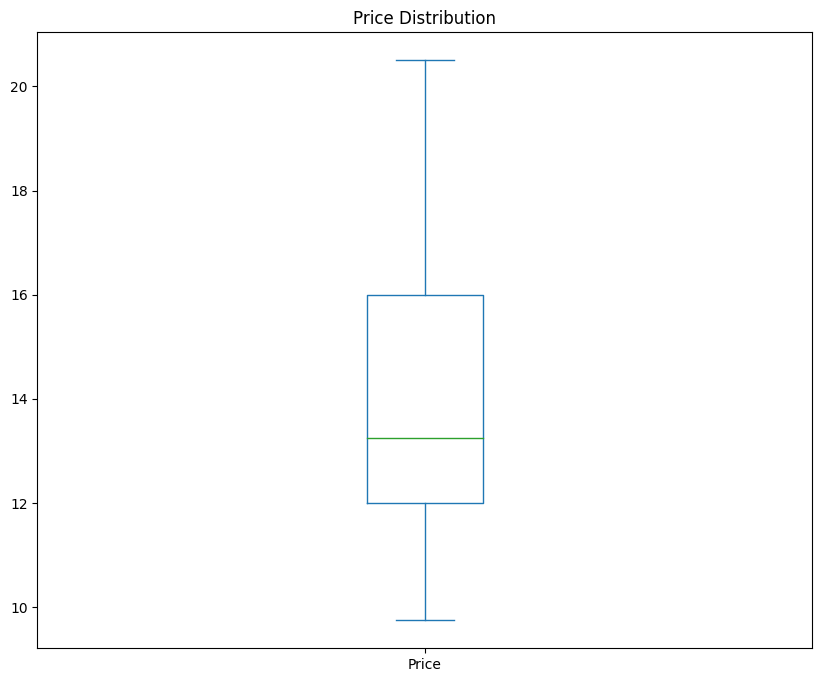

In [63]:
#Melihat distribusi data baru
df6clean['Price'].plot(kind='box', title='Price Distribution', figsize=(10,8))
plt.show() 

Hasil analisa

Data sudah terdistribusi dengan baik setelah outlier dihilangkan.

###Menjawab poin pertanyaan nomor 7
Menghitung total penjualan yang harus didapatkan di cabang baru?

In [64]:
#Menghitung confidence interval dari jumlah sales per hari
daily_sales = dfclean[['Time','Price']].groupby(dfclean['Date']).sum().sort_values('Date')
ci= stats.norm.interval(0.90,daily_sales.Price.mean(), daily_sales.Price.std())
ci

<ipython-input-64-27f4bc3be017>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = dfclean[['Time','Price']].groupby(dfclean['Date']).sum().sort_values('Date')


(1616.8021394695825, 2952.2484191896347)

Hasil analisa

Bila ingin membuka cabang baru, sebaiknya cabang baru mampu mendapatkan penjualan per hari minimal $1616.80

dan maksimal  $2952.24 untuk bisa menyamakan total penjualan per hari dari cabang pertama.

###**Jawaban Poin Penjabaran**
1. Total penjualan pizza selama tahun 2015 adalah $817860.05

2. Total pizza yang terjual selama tahun 2015 sebanyak 49574 dengan Pizza classic_dlx sebagai pizza yang terjual paling banyak dengan total penjualan sebanyak 2453 pizza dan Pizza brie_carre sebagai pizza yang paling sedikit terjual dengan total penjualan 490 pizza.

3. Type Pizza yang memberikan paling banyak penjualan adalah type classic dengan total penjualan $220053.1

4. Size pizza dan type pizza yang paling banyak terjual adalah type veggie dengan size L dengan total penjualan $104202.70

5. Penjualan terbanyak di tahun 2015 terdapat di bulan Juli dengan total penjualan $72557.90

6. Data sudah terdistribusi dengan baik setelah outlier dihilangkan.

7. Bila ingin membuka cabang baru, sebaiknya cabang baru mampu mendapatkan penjualan per hari minimal $$1616.80 dan maksimal  $2952.24 untuk bisa menyamakan total penjualan per hari dari cabang pertama.

#**Pengambilan Kesimpulan**
Restoran pizza tersebut bisa dikatakan sukses melihat mereka mempunyai tingkat penjualan yang baik. Rekomendasi saya adalah mencoba untuk mencari pelanggan terbaik dan memberi sebuah penghargaan kepada pelanggan tersebut agar tetap menjadi pelanggan dan memotivasi pelanggan lain untuk bisa juga menjadi pelanggan terbaik yang akhirnya akan meningkatkan penjualan restoran.

Untuk cabang baru, bisa mengikuti sistem dari cabang pertama, namun saya sarankan melakukan sebuah promosi untuk menarik pelanggan baru dan untuk memberi tahu kehadiran cabang kedua kepada masyarakat.